# Part 1: Regression Task
---

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from tabulate import tabulate
import random
random.seed(42)
np.random.seed(42)

In [2]:
# Exploring the data
df = pd.read_csv('Stopping.csv')
print(df)

    Speed  Distance
0       4         4
1       5         2
2       5         4
3       5         8
4       5         8
..    ...       ...
57     35       107
58     36        79
59     39       138
60     40       110
61     40       134

[62 rows x 2 columns]


In [3]:
# Checking the data type:
df.dtypes

,0
Speed,int64
Distance,int64


In [4]:
# Checking if there are any null values in the dataset
df.isnull().any()

,0
Speed,False
Distance,False


Task 1.1

In [5]:
# Linear Regression
# Declaring the variables
# X = independant variable: Speed (needs to be a dataframe,c so use [[]])
# y = dependant variable: Distance
X = df[['Speed']]
y = df['Distance']

In [6]:
X.shape
print(type(X))
# X = X.reshape(-1,1)

<class 'pandas.core.frame.DataFrame'>


In [7]:
# splitting the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=42)

In [8]:
# building the Linear Regression model
# y = mX + b
lr = LinearRegression()

In [9]:
# fitting the data in the model
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
# coefficient or slope of the line
# the lr.coef_ will tell us that an increase in speed will lead to an increase in distance by output amount
print(lr.coef_)

[2.9667382]


In [11]:
# when speed = 0, distance = intercept⬇️
print(lr.intercept_)

-18.879653658049712


In [12]:
# predicting distance based on speed
y_pred = lr.predict(X_test)

In [13]:
# printing the predicted values
print(y_pred)
print(y_test.values)

[67.15575407 84.95618325 -7.01270087 84.95618325  1.88751372 64.18901587
 10.78772832  7.82099012 25.6214193  96.82313604 31.5548957   4.85425192
 61.22227767  7.82099012 34.5216339  37.48837209 -4.04596267 16.72120471
 70.12249226]
[ 54  85   4 107   7  64  17   5  16 138  29  11  78  13  47  30   8  11
 101]


In [14]:
# building the Polynomial Regression model with degree = 2
# y = β + β1X + β2Xˆ2
pr = PolynomialFeatures(degree = 2)
X_train_p = pr.fit_transform(X_train)
X_test_p = pr.transform(X_test)

In [15]:
# training the model
poly_lr = LinearRegression()
poly_lr.fit(X_train_p, y_train)

LinearRegression()

In [16]:
# predicting
y_pred_p = poly_lr.predict(X_test_p)

In [17]:
# Coefficient for polynomial regression with degree 2
print(poly_lr.coef_)

[0.         0.63191779 0.05603184]


In [18]:
# intercept for polynomial regression with degree 2
print(poly_lr.intercept_)

0.3966086819856045


In [19]:
# Polynomial Regression model with degree = 3
# y = β + β1X + β2Xˆ2 + β3Xˆ3
pr3 = PolynomialFeatures(degree = 3)
X_train_p3 = pr3.fit_transform(X_train)
X_test_p3 = pr3.transform(X_test)

In [20]:
# training the model
poly_lr3 = LinearRegression()
poly_lr3.fit(X_train_p3, y_train)

LinearRegression()

In [21]:
# predicting
y_pred_p3 = poly_lr3.predict(X_test_p3)

In [22]:
# Coefficient for polynomial regression with degree 3
print(poly_lr3.coef_)

[ 0.00000000e+00  1.98562408e+00 -1.45170070e-02  1.05882480e-03]


In [23]:
# intercept for polynomial regression with degree 3
print(poly_lr3.intercept_)

-6.571054534272392


Task 1.2

In [24]:
# to test on linear regression test dataset
# using tabulate for better readability
table = list(zip(X_test['Speed'], y_test, y_pred))
print(tabulate(table, headers = ["Speed", "Test distance", "Predicted distance"]))

  Speed    Test distance    Predicted distance
-------  ---------------  --------------------
     29               54              67.1558
     35               85              84.9562
      4                4              -7.0127
     35              107              84.9562
      7                7               1.88751
     28               64              64.189
     10               17              10.7877
      9                5               7.82099
     15               16              25.6214
     39              138              96.8231
     17               29              31.5549
      8               11               4.85425
     27               78              61.2223
      9               13               7.82099
     18               47              34.5216
     19               30              37.4884
      5                8              -4.04596
     12               11              16.7212
     30              101              70.1225


In [25]:
# For Linear Regression
lr_MAE = mean_absolute_error(y_test, y_pred)
lr_MSE = mean_squared_error(y_test, y_pred)
lr_RMSE = root_mean_squared_error(y_test, y_pred)
lr_R2 = r2_score(y_test, y_pred)
print(f" Linear Regression MAE = {lr_MAE}")
print(f" Linear Regression MSE = {lr_MSE}")
print(f" Linear Regression RMSE = {lr_RMSE}")
print(f" Linear Regression R2 = {lr_R2}")

 Linear Regression MAE = 11.087259207505738
 Linear Regression MSE = 228.25103406651817
 Linear Regression RMSE = 15.10797915230618
 Linear Regression R2 = 0.8566481849373467


In [26]:
# For Polynomial Regression of degree 2
pr_MAE = mean_absolute_error(y_test, y_pred_p)
pr_MSE = mean_squared_error(y_test, y_pred_p)
pr_RMSE = root_mean_squared_error(y_test, y_pred_p)
pr_R2 = r2_score(y_test, y_pred_p)
print(f" Polynomial Regression (Degree = 2) MAE = {pr_MAE}")
print(f" Polynomial Regression (Degree = 2) MSE = {pr_MSE}")
print(f" Polynomial Regression (Degree = 2) RMSE = {pr_RMSE}")
print(f" Polynomial Regression (Degree = 2) R2 = {pr_R2}")

 Polynomial Regression (Degree = 2) MAE = 8.726619840934255
 Polynomial Regression (Degree = 2) MSE = 158.21962845767766
 Polynomial Regression (Degree = 2) RMSE = 12.578538407051816
 Polynomial Regression (Degree = 2) R2 = 0.9006310266645413


In [28]:
# For Polynomial Regression of degree 3
pr3_MAE = mean_absolute_error(y_test, y_pred_p3)
pr3_MSE = mean_squared_error(y_test, y_pred_p3)
pr3_RMSE = root_mean_squared_error(y_test, y_pred_p3)
pr3_R2 = r2_score(y_test, y_pred_p3)
print(f" Polynomial Regression (Degree = 3) MAE = {pr3_MAE}")
print(f" Polynomial Regression (Degree = 3) MSE = {pr3_MSE}")
print(f" Polynomial Regression (Degree = 3) RMSE = {pr3_RMSE}")
print(f" Polynomial Regression (Degree = 3) R2 = {pr3_R2}")

 Polynomial Regression (Degree = 3) MAE = 9.002675448876635
 Polynomial Regression (Degree = 3) MSE = 161.4531663131979
 Polynomial Regression (Degree = 3) RMSE = 12.706422246769462
 Polynomial Regression (Degree = 3) R2 = 0.8986002208784544


The above methods we have used to evaluate the performance of regression models includes us calculating various metrics upon 2 values -

1. Authentic values (y_test)
2. Anticipated values (y_pred/y_pred_p/y_pred_p3)

The difference or similarity between these 2 sets tells us all about the performance. We have made use of scikit-learn which is a highly regarded and widely used machine learning library. The functions we will be using are as follows:

1. Mean absolute error (MAE) - This will tell us about the average difference between authentic and anticipated values. For example, if the MAE is 6.2 then the error between expected speed and actual speed on an average is 6.2 km
2. Mean squared error (MSE) - Squared difference between authentic and anticipated values. The error value is squared before it is averaged. This helps in understanding the error occuring on larger values.
3. Root mean squared error (RMSE) - Average difference between authentic and anticipated values after being squared. Basically the square root of MSE.
4. Rˆ2 score (R2) - Tells us how well the model fits the data (variance). This value lies between 0 and 1. If the model has a R² score of 96%, it means that the model can explain 96% of variation in distance according to speed.

Task 1.3

Underfitting is when a model doesn't capture all the pattern in the data or is too simple. Underfit models have a low variance and high error.

Overfit models are the opposite of underfit models i.e. they capture everything in the data along with additional unnecessary data. Overfit models give a perfect score during training but work poorly on testing/unseen data.

According to our findings -

For linear regression:

MAE is the highest when compared to other models, which tells us that the overall prediction of distance is off by ~81 feet.

MSE and RMSE of linear regression model are almost double when compared to other models, so the model has made significant errors while predicting large stopping distances.

R² test tells us that the model is able to explain 86% of the variance in stopping distance based on speed.

This model exhibits high errors as seen after calculating MAE, MSE, and RMSE which can be a case of underfitting. Since it’s a linear regression model, it assumes the relationship to be a straight line and possibly won't give us accurate results by considering the complexity of the data in real life.

For polynomial regression (degree = 2):

MAE tells us that the overall prediction is off only by ~8.7 feet which is a large improvement when compared to our linear regression model. The lower the MAE, the better the model.

MSE and RMSE are much lower than that of the linear regression model. This means this model is somewhat reliable at predicting the distance at large stopping distances.

R² test explains 95% of variance in stopping distance based on speed.

Our observations have improved immensely as observed by comparing the MAE, MSE, and RMSE with the linear regression model. This model introduces curvature which captures the actual relationship between speed and distance. Since the errors observed are smaller and the model is able to explain a high amount of variance, we can say that this model looks like a perfect fit for our data up until now.

For polynomial regression (degree = 3):

MAE for this model has exhibited a further reduction in error prediction compared to the degree 2 polynomial regression model, with this model's MAE being ~6.2.

MSE and RMSE were also slightly lower than the previous model, making polynomial regression with degree 3 the best fit model up till now.

A slight improvement in R² test to 96%, indicating an even better explanation of variance compared to polynomial regression (degree = 2).

The R² score has increased slightly and the model’s calculated error metrics are better than both the linear regression and polynomial regression (degree 2) models. This means that while the model has increased in complexity, it translates to better performance and not overfitting in this case. Final verdict is that polynomial regression degree 3 is the best performing model overall.

Task 1.4

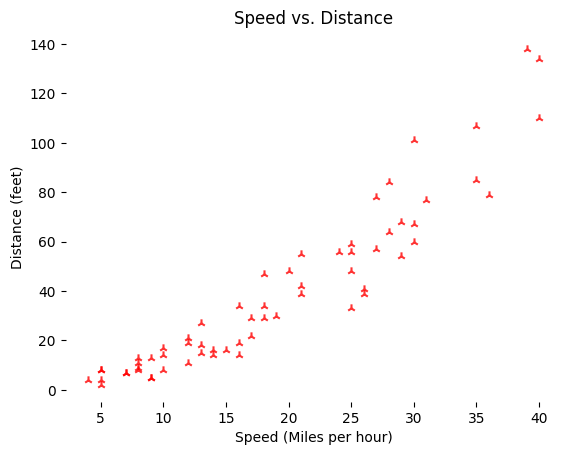

In [29]:
# Visualising the dataset with the help of scatterplot
X = df.Speed
y = df.Distance
plt.scatter(X,y, color = 'red', marker = "2", alpha = 0.8)
plt.title("Speed vs. Distance")
plt.xlabel('Speed (Miles per hour)')
plt.ylabel('Distance (feet)')
plt.box(False)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


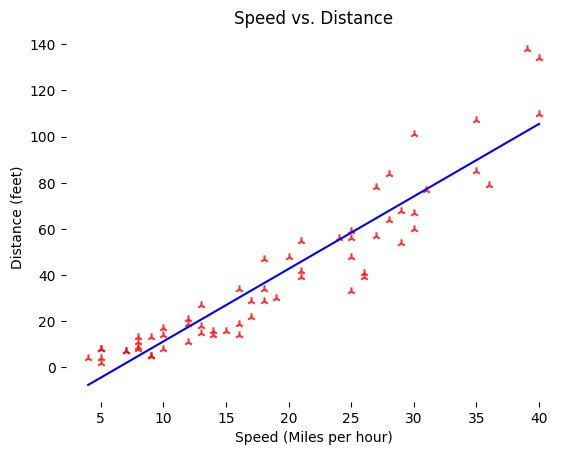

In [41]:
# Visualising linear regression plot
lr = LinearRegression()
lr.fit(pd.DataFrame(X), y)
pred = lr.predict(X.values.reshape(-1,1))
plt.scatter(X, y, color = 'red', marker = "2", alpha = 0.8)
plt.plot(X, pred, color = 'blue')
plt.title("Speed vs. Distance")
plt.xlabel('Speed (Miles per hour)')
plt.ylabel('Distance (feet)')
plt.box(False)
plt.show()

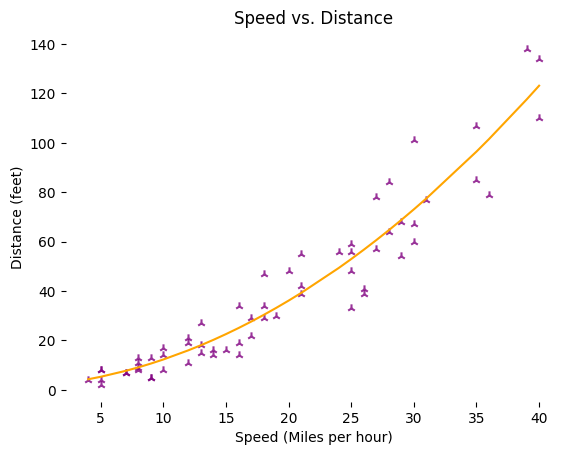

In [42]:
# Visualising polynomial regression of degree 2 plot
pr = PolynomialFeatures(degree = 2)
pX = pr.fit_transform(X.values.reshape(-1,1))
lr = LinearRegression()
lr.fit(pX, y)
pred = lr.predict(pX)
plt.scatter(X, y, color = 'purple', marker = "2", alpha = 0.8)
plt.plot(X, pred, color = 'orange')
plt.title("Speed vs. Distance")
plt.xlabel('Speed (Miles per hour)')
plt.ylabel('Distance (feet)')
plt.box(False)
plt.show()

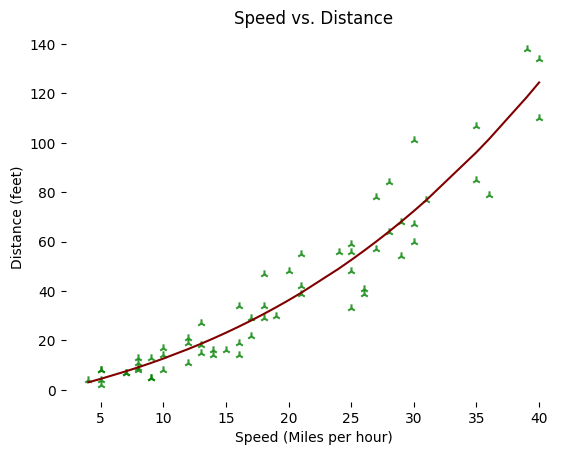

In [43]:
# Visualising polynomial regression of degree 3 plot
pr = PolynomialFeatures(degree = 3)
pX = pr.fit_transform(X.values.reshape(-1,1))
lr = LinearRegression()
lr.fit(pX, y)
pred = lr.predict(pX)
plt.scatter(X, y, color = 'green', marker = "2", alpha = 0.8)
plt.plot(X, pred, color = 'maroon')
plt.title("Speed vs. Distance")
plt.xlabel('Speed (Miles per hour)')
plt.ylabel('Distance (feet)')
plt.box(False)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


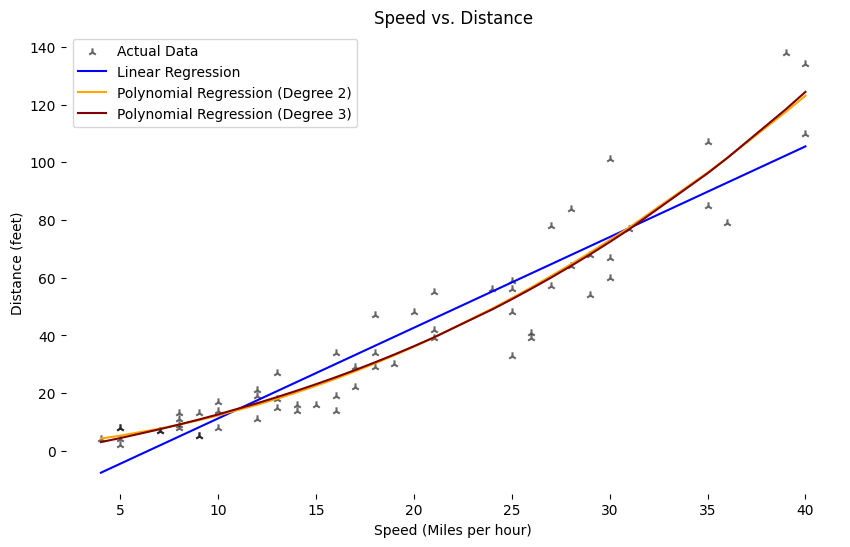

In [44]:
# Visualising all the plots together
X_reshaped = X.values.reshape(-1, 1)

# Linear Regression
lr = LinearRegression()
lr.fit(pd.DataFrame(X), y)
pred_lr = lr.predict(X_reshaped)

# Polynomial Regression (degree = 2)
pr2 = PolynomialFeatures(degree=2)
pX2 = pr2.fit_transform(X_reshaped)
lr2 = LinearRegression()
lr2.fit(pX2, y)
pred_p2 = lr2.predict(pX2)

# Polynomial Regression (degree = 3)
pr3 = PolynomialFeatures(degree=3)
pX3 = pr3.fit_transform(X_reshaped)
lr3 = LinearRegression()
lr3.fit(pX3, y)
pred_p3 = lr3.predict(pX3)

plt.figure(figsize=(10,6))
plt.scatter(X, y, color='black', marker="2", alpha=0.6, label='Actual Data')
plt.plot(X, pred_lr, color='blue', label='Linear Regression')
plt.plot(X, pred_p2, color='orange', label='Polynomial Regression (Degree 2)')
plt.plot(X, pred_p3, color='maroon', label='Polynomial Regression (Degree 3)')
plt.title("Speed vs. Distance")
plt.xlabel('Speed (Miles per hour)')
plt.ylabel('Distance (feet)')
plt.legend()
plt.box(False)
plt.show()

# Part 2: Classification Task
---

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import random
random.seed(42)
np.random.seed(42)

In [46]:
# Loading and displaying the dataset
df = pd.read_csv('CancerClassification.csv')
print(df)

     Cl.thickness  Cell.size  Cell.shape  Marg.adhesion  Epith.c.size  \
0       45.112062  51.798322   47.877500      53.385136     58.408301   
1       70.864529  57.307064   63.333871      62.865781     55.409522   
2       49.307810  71.424268   42.062140      40.255089     35.533395   
3       66.775425  60.810981   64.712988      79.132088     67.626699   
4       52.012773  62.644698   67.966587      43.309239     51.623986   
..            ...        ...         ...            ...           ...   
678     45.895448  58.859543   63.878934      59.358741     50.247380   
679     68.697373  37.409173   49.989872      49.115574     55.864530   
680     51.550280  69.778100   54.258628      55.536820     57.292757   
681     63.460881  49.141312   38.042230      61.115623     33.504183   
682     51.766514  41.607881   64.059539      62.313476     44.386715   

     Bare.nuclei  Bl.cromatin  Normal.nucleoli    Mitoses  Class  
0      39.929594    46.499295        50.669261  53.07839

In [47]:
# Exploring the data
df.columns

Index(['Cl.thickness', 'Cell.size', 'Cell.shape', 'Marg.adhesion',
       'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin', 'Normal.nucleoli',
       'Mitoses', 'Class'],
      dtype='object')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cl.thickness     683 non-null    float64
 1   Cell.size        683 non-null    float64
 2   Cell.shape       683 non-null    float64
 3   Marg.adhesion    683 non-null    float64
 4   Epith.c.size     683 non-null    float64
 5   Bare.nuclei      683 non-null    float64
 6   Bl.cromatin      683 non-null    float64
 7   Normal.nucleoli  683 non-null    float64
 8   Mitoses          683 non-null    float64
 9   Class            683 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 53.5 KB


In [49]:
df.describe()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,53.794592,54.493624,54.902298,53.704678,53.722228,54.141138,53.836756,54.427693,53.636725,0.349927
std,10.332521,10.368235,10.160878,10.669766,10.474714,10.146594,9.756423,10.102067,9.927914,0.477296
min,11.641612,23.947718,24.821445,20.475761,23.598114,19.397066,21.727114,23.159512,24.521231,0.000000
25%,46.575414,47.319452,47.773908,45.897371,46.664622,47.945944,47.385312,47.882020,46.578237,0.000000
50%,54.239844,54.508344,55.160264,53.432298,53.815078,53.823819,54.120836,54.539211,54.060280,0.000000
75%,60.300560,61.436500,62.065397,60.865782,60.741584,61.112674,60.397951,60.919610,60.357356,1.000000
max,89.699515,93.321471,87.376942,85.833716,89.550155,85.626194,79.255614,85.948280,86.227466,1.000000


In [50]:
df.isnull().sum()

,0
Cl.thickness,0
Cell.size,0
Cell.shape,0
Marg.adhesion,0
Epith.c.size,0
Bare.nuclei,0
Bl.cromatin,0
Normal.nucleoli,0
Mitoses,0
Class,0


In [51]:
# Exploring our target
df['Class'].value_counts()

,count
Class,
0,444
1,239


<Axes: xlabel='Class', ylabel='count'>

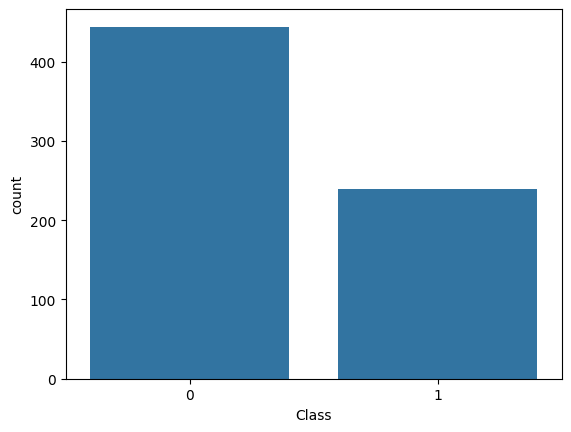

In [52]:
# Visualizing our target using sns plot
sns.countplot(x='Class', data=df)

Task 2.1

In [53]:
# Seperating the data into features and target (X and y)
X = df.drop('Class', axis = 1)
y = df['Class']

In [54]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Selecting and fitting the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [56]:
y_pred = model.predict(X_test)

In [57]:
#  First 10 predictions
print(y_pred[:10])

# Actual values
print(y_test.values[:10])

[0 0 1 0 0 0 0 0 0 0]
[1 1 0 0 0 0 0 0 1 0]


Task 2.2

In [58]:
print(confusion_matrix(y_test, y_pred))

[[72  7]
 [36 22]]


In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77        79
           1       0.76      0.38      0.51        58

    accuracy                           0.69       137
   macro avg       0.71      0.65      0.64       137
weighted avg       0.71      0.69      0.66       137



In [60]:
score = accuracy_score(y_test, y_pred)
print(score)

0.6861313868613139


Confusion Matrix is a method which helps us in summarising the performance metrics of our model. We understand the specificity, sensitivity and accuracy of our model with the help of the confusion matrix. We have a 2x2 matrix with each cell representing the comparison between the prediction and actual values.

In cell 1x1, which is True Negative (TN) – the model predicts 0 while the actual value is 0. The model was successful 72 times.

In cell 1x2: False Positive (FP) – the model predicts 0 as 1; 7 times.

In cell 2x1: False Negative (FN) – the model predicts 1 as 0; 36 times.

In cell 2x2: True Positive (TP) – the model predicts 1 as 1; 22 times.

The classification report gives us precision, recall and F1-score of our model in a tabular format.

Precision gives us the amount of correct positive predictions and the formula is:
Precision = TP / (TP + FP)

Recall gives us the proportion of actual positives our model was able to identify and it is given by:
Recall = TP / (TP + FN)

F1-score gives us a balance between Precision and Recall, and its formula is:
F1-score = 2 × (Precision × Recall) / (Precision + Recall)

Accuracy Score gives us a percentage of the number of accurate predictions made by our model, divided by the total number of predictions:
Accuracy = (TP + TN) / (TP + TN + FP + FN)

Task 2.3

The overall accuracy of our model is 68.6%, a decent score but considering the context of our project this cannot be the only defining metric. Addressing the output of our classification report reveals several insights regarding the performance of our model. The model's precision for malignant (Class 1) is 0.76, meaning when it predicts a case as malignant, it is correct 76% of the time. Recall for our model in Class 0 is 0.91 and Class 1 is 0.38; this is concerning since our model is far better at identifying cases where cancer cells are benign than cases where cancer cells are malignant. Ideally, recall for malignant (Class 1) cases should be as high as possible, since it is very important to not miss an actual cancer diagnosis, but our model is only able to correctly identify 38% of actual malignant cases. F1-score for Class 0 of this model is 0.77, which is good, but the model should perform better at predicting Class 1 which has an F1-score of only 0.51. Support shows our test data has 79 cases of Class 0 which is slightly higher than the 58 cases of Class 1, indicating a mild class imbalance.

The most important metric in our context of breast cancer classification is Recall for Class 1, which refers to malignant cases, since it is essential to identify patients who truly have cancer. Here, false negatives can lead to fatal consequences. Since we have a greater number of Class 0, accuracy will be ineffective as the model can just predict "Benign" most of the time and have a similar performance. This is called class imbalance and it affects the performance of our model. Precision for Class 1 is also good, indicating that when the model identifies a case as malignant, it is correct most of the time. However, it is less critical than recall in our context.



Task 2.4

<Axes: >

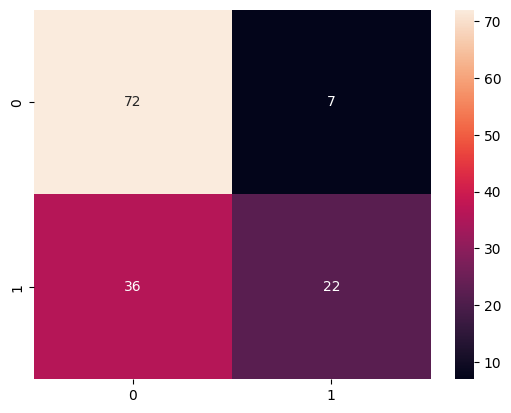

In [61]:
# confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

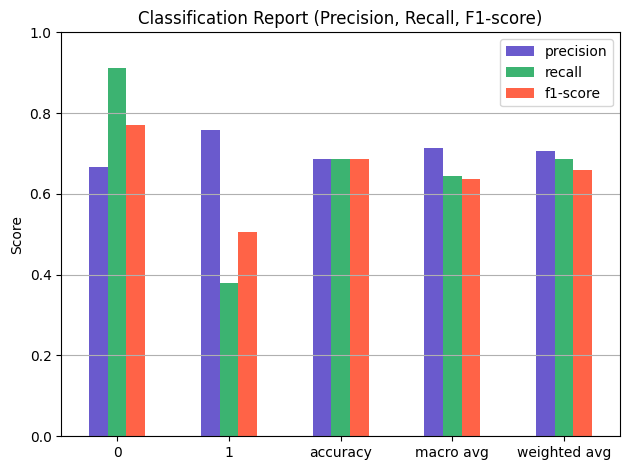

In [62]:
# classification report barplot
cr = classification_report(y_test, y_pred, output_dict=True)
df_cr = pd.DataFrame(cr).transpose()[['precision', 'recall', 'f1-score']]
df_cr.plot(kind='bar', color = ['slateblue', 'mediumseagreen', 'tomato'])
plt.title('Classification Report (Precision, Recall, F1-score)')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.grid(axis = 'y')
plt.show()

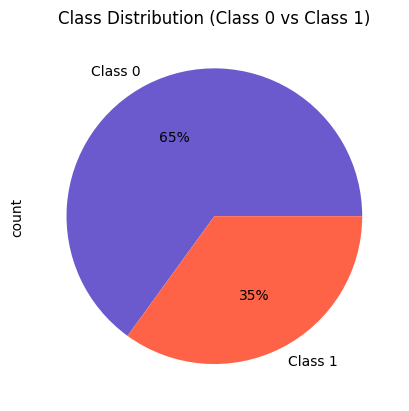

In [63]:
# Class imbalance
df['Class'].value_counts().plot(kind='pie', autopct='%1.0f%%', labels = ['Class 0', 'Class 1'], colors = ['slateblue', 'tomato'])
plt.title('Class Distribution (Class 0 vs Class 1)')
plt.show()

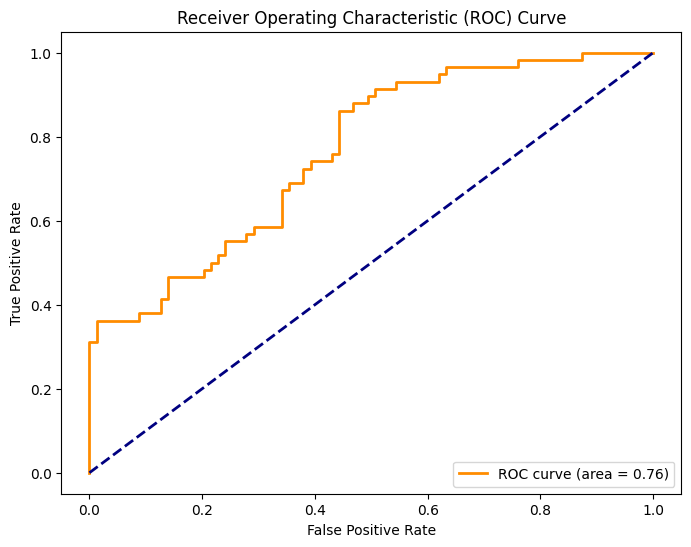

In [66]:
# ROC and AUC
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc= auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()